In [473]:
#Import packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')


In [474]:
df_train=pd.read_csv(r"E:\Siemens_test\dataset\train.csv") #Load Dataset

# Basic data analysis

In [475]:
df_train.head()

,date_time,temp,humidity,light,co2,humidity_ratio,suitable
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [476]:
df_train.shape

(15080, 7)

We have 15080 Ros & 7 Columns including Target variable

In [477]:
df_train.describe()

,temp,humidity,light,co2,humidity_ratio,suitable
count,15080.000000,15080.000000,15080.000000,15080.000000,15080.000000,15080.000000
mean,20.948475,26.520671,139.891070,621.148233,0.004066,0.242241
std,1.145097,5.064903,219.841563,272.904169,0.000789,0.428454
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,22.790000,0.000000,447.000000,0.003508,0.000000
50%,20.730000,26.100000,0.000000,507.000000,0.003991,0.000000
75%,21.675000,30.125000,399.500000,664.250000,0.004615,0.000000
max,24.408333,39.500000,1697.250000,2028.500000,0.006476,1.000000


There is no missing values in data which we can check by above 'count'.

The mean of light & Co2 is quit high than other variables probably due to different variable scales or outliers.

The all values of humidity ratio is below 0. 

In [478]:
df_train['suitable'].value_counts()

0    11427
1     3653
Name: suitable, dtype: int64

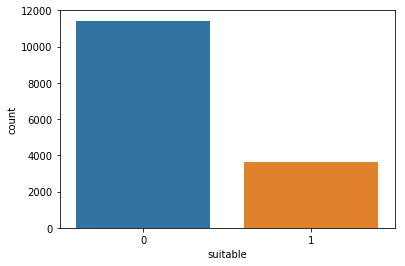

In [479]:
sns.countplot(df_train['suitable'])
plt.show()

As we check target variable & find that data is imbalanced

We can upsample or downsample the data to resolve this isssue or there is another technique which is ensable learning method to handle imbalanced dataset. 


In [480]:
df_train.isna().sum() #We have zero missing values

date_time         0
temp              0
humidity          0
light             0
co2               0
humidity_ratio    0
suitable          0
dtype: int64

In [481]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15080 entries, 0 to 15079
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date_time       15080 non-null  object 
 1   temp            15080 non-null  float64
 2   humidity        15080 non-null  float64
 3   light           15080 non-null  float64
 4   co2             15080 non-null  float64
 5   humidity_ratio  15080 non-null  float64
 6   suitable        15080 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 824.8+ KB


# Check Correlation matrix

In [482]:
df_train.corr()

,temp,humidity,light,co2,humidity_ratio,suitable
temp,1.000000,-0.137672,0.688205,0.550971,0.237337,0.558213
humidity,-0.137672,1.000000,0.006267,0.310240,0.927779,0.085588
light,0.688205,0.006267,1.000000,0.617691,0.266428,0.908186
co2,0.550971,0.310240,0.617691,1.000000,0.530475,0.664946
humidity_ratio,0.237337,0.927779,0.266428,0.530475,1.000000,0.303626
suitable,0.558213,0.085588,0.908186,0.664946,0.303626,1.000000


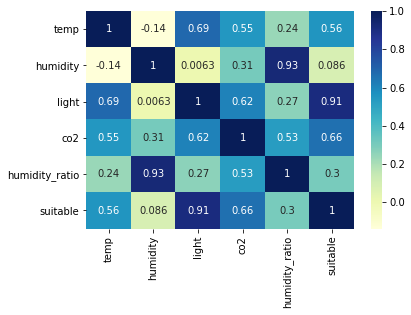

In [483]:
sns.heatmap(df_train.corr(),cmap='YlGnBu',annot=True)
plt.show()

As we checked 'co2' & 'light' both variables are highly correlated with target.

After that 'temp' is moderate correlated also 'humadity' and 'humadity_ratio' is less correlated with target.

# Outliers treatment

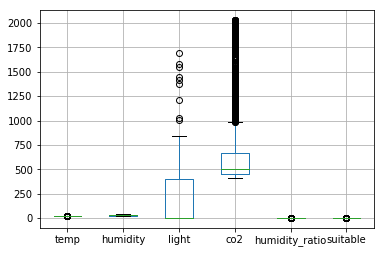

In [484]:
df_train.boxplot()

We found outliers in 'light','co2'&little bit in 'humidity'.

In [485]:
def outliers_cap(df,col,factor):
    for col in col:
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        
        iqr=q3-q1
        
        upper_whisker=q3+(factor*iqr)
        lower_whisker=q1-(factor*iqr)
        
        df[col]=np.where(df[col]>upper_whisker,upper_whisker,np.where(df[col]<lower_whisker,lower_whisker,df[col]))
        
        

In [486]:
features=df_train[['temp','humidity','light','co2','humidity_ratio']]

In [487]:
outliers_cap(df_train,features,1.5)

#### Check 0 & 1 with group by

In [488]:
df_train.groupby('suitable').light.agg(light_max=('max'),light_min=('min'),light_mean=('mean'))

,light_max,light_min,light_mean
suitable,,,
0,998.75,0.0,26.920457
1,998.75,0.0,492.364807


In [489]:
df_train.groupby('suitable').humidity_ratio.agg(Humidity_max=('max'),Humidity_min=('min'),Humidity_mean=('mean'))

,Humidity_max,Humidity_min,Humidity_mean
suitable,,,
0,0.006218,0.002674,0.003930
1,0.006276,0.002715,0.004486


# Check distribution of numeric variables

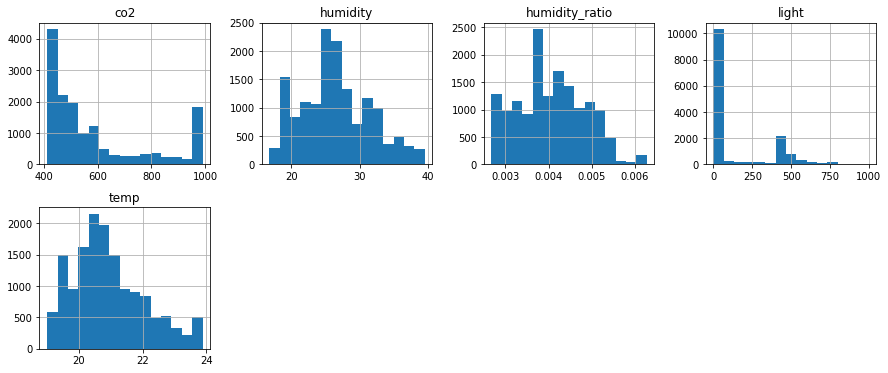

In [490]:
df_train[['temp','humidity','light','co2','humidity_ratio']].hist(bins=15, figsize=(15, 6), layout=(2, 4));

only 'humidity' follows normal distribution.

'temp' follows right skewed distribution

#### To scale down all features on same scale and to reduce skewness of the features we need to transform them between 0-1.

In [491]:
#We have to make normalize light & CO2 due to high value range than other columns
from sklearn.preprocessing import MinMaxScaler

In [492]:
#Saperate numeric columns from original df excluding target variable
num_data=df_train.select_dtypes(include=np.number)

#### Remove target variable & set to y

In [493]:
y=num_data.pop('suitable')

In [494]:
num_data

,temp,humidity,light,co2,humidity_ratio
0,23.700000,26.272000,585.200000,749.200000,0.004764
1,23.718000,26.290000,578.400000,760.400000,0.004773
2,23.730000,26.230000,572.666667,769.666667,0.004765
3,23.722500,26.125000,493.750000,774.750000,0.004744
4,23.754000,26.200000,488.600000,779.000000,0.004767
...,...,...,...,...,...
15075,20.417500,35.317500,37.000000,504.000000,0.005247
15076,20.500000,35.400000,23.500000,509.000000,0.005286
15077,20.426667,35.363333,19.000000,508.000000,0.005257
15078,20.390000,35.372500,33.500000,505.000000,0.005246


In [495]:
scaler=MinMaxScaler()
scaler.fit(num_data)
#Scaled numeric features & rename scaled columns 
Scaled_df_train=scaler.transform(num_data)
Scaled_df_train=pd.DataFrame(Scaled_df_train,columns=['S_temp','S_humidity','S_light','S_co2','S_humidity_ratio'])

In [496]:
Scaled_df_train.head()

,S_temp,S_humidity,S_light,S_co2,S_humidity_ratio
0,0.961637,0.418677,0.585932,0.582724,0.580297
1,0.965320,0.419468,0.579124,0.602122,0.582657
2,0.967775,0.416831,0.573383,0.618171,0.580572
3,0.966240,0.412217,0.494368,0.626976,0.574636
4,0.972685,0.415513,0.489212,0.634336,0.580972


In [497]:
Scaled_df_train.describe()

,S_temp,S_humidity,S_light,S_co2,S_humidity_ratio
count,15080.000000,15080.000000,15080.000000,15080.000000,15080.000000
mean,0.397956,0.429605,0.139845,0.309252,0.386137
std,0.232371,0.222584,0.218994,0.326307,0.218315
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.245524,0.265656,0.000000,0.059320,0.231564
50%,0.353964,0.411118,0.000000,0.163239,0.365668
75%,0.547315,0.588003,0.400000,0.435592,0.538938
max,1.000000,1.000000,1.000000,1.000000,1.000000


### Concat df_train & scaled_df_train to create a new 'train' DataFrame

In [498]:
train=pd.concat([df_train,Scaled_df_train],axis=1) #Concat scaled columns with exsting dataset

In [499]:
train.head()

,date_time,temp,humidity,light,co2,humidity_ratio,suitable,S_temp,S_humidity,S_light,S_co2,S_humidity_ratio
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1,0.961637,0.418677,0.585932,0.582724,0.580297
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1,0.965320,0.419468,0.579124,0.602122,0.582657
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1,0.967775,0.416831,0.573383,0.618171,0.580572
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1,0.966240,0.412217,0.494368,0.626976,0.574636
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1,0.972685,0.415513,0.489212,0.634336,0.580972


#### Remove old (non scaled) features

In [500]:
train=train.drop(['temp','humidity','light','co2','humidity_ratio'],axis=1)

In [501]:
date_time=train['date_time']

#### Remove prefix 'S_' & rename columns with original name

In [502]:
train.columns=train.columns.str.replace('S_','')

In [503]:
train=train[['temp','humidity','light','co2','humidity_ratio']];train.head()

,temp,humidity,light,co2,humidity_ratio
0,0.961637,0.418677,0.585932,0.582724,0.580297
1,0.965320,0.419468,0.579124,0.602122,0.582657
2,0.967775,0.416831,0.573383,0.618171,0.580572
3,0.966240,0.412217,0.494368,0.626976,0.574636
4,0.972685,0.415513,0.489212,0.634336,0.580972


In [504]:
#Add 'date_time' to dataset
train['date_time']=date_time

### Need to convert date_time into date_time


In [505]:
train['date_time']=pd.to_datetime(train.date_time)

### Seperate hrs from datetime & add as a new column hrs in existing data

In [506]:
train['hrs']=train.date_time.dt.hour

In [507]:
train.head()

,temp,humidity,light,co2,humidity_ratio,date_time,hrs
0,0.961637,0.418677,0.585932,0.582724,0.580297,2015-02-02 14:19:00,14
1,0.965320,0.419468,0.579124,0.602122,0.582657,2015-02-02 14:19:59,14
2,0.967775,0.416831,0.573383,0.618171,0.580572,2015-02-02 14:21:00,14
3,0.966240,0.412217,0.494368,0.626976,0.574636,2015-02-02 14:22:00,14
4,0.972685,0.415513,0.489212,0.634336,0.580972,2015-02-02 14:23:00,14


In [508]:
train['hrs'].unique() #Check hrs is correct or not

array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12, 13], dtype=int64)

#### Remove Date_time from dataframe

In [509]:
X=train.drop(['date_time'],axis=1) #Store dataset to X
Y=y  # target variable

# Train Test split

In [510]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [520]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(10556, 6)
(4524, 6)
(10556,)
(4524,)


# Model Building

In [521]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [522]:
rf_model=RandomForestClassifier(n_estimators=100) #Import Random Forest classifier

In [525]:
model_rf=rf_model.fit(X_train,Y_train) #Fit the model

In [526]:
model_rf.score(X_train,Y_train) #Check model score, it seems overfitted

1.0

In [527]:
X_train.keys()

Index(['temp', 'humidity', 'light', 'co2', 'humidity_ratio', 'hrs'], dtype='object')

In [528]:
model_rf.feature_importances_

array([0.13283962, 0.0253121 , 0.53600537, 0.18821689, 0.03071374,
       0.08691228])

most important features or we can say that 'temp' & 'Co2' are the variables those are mostly affect on target variable

In [529]:
pred=model_rf.predict(X_test) #Prediction on test data

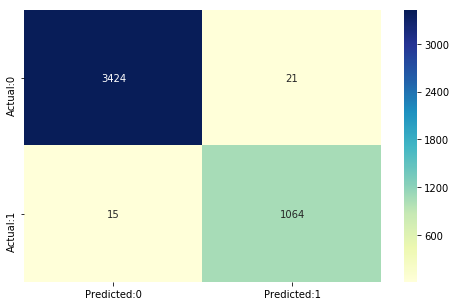

In [530]:
cm_rf=confusion_matrix(Y_test,pred)
conf_matrix=pd.DataFrame(data=cm_rf,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# Hyper parameter Tunning

In [531]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [532]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [533]:
rf_RandomGrid = RandomizedSearchCV(estimator = rf_model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [534]:
model=rf_RandomGrid.fit(X_train, Y_train) #Fit model on X_train & Y_train

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   11.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   20.0s finished


In [535]:
rf_RandomGrid.best_params_ # Find best paramters

{'n_estimators': 25,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 4,
 'bootstrap': True}

In [536]:
y_pred=model.predict(X_test) #Prediction on X_test

In [537]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9885057471264368


So we achieved good accuracy on model prediction too

In [538]:
matrix=confusion_matrix(Y_test,y_pred)

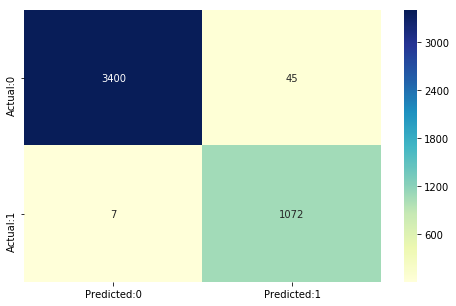

In [539]:
conf_matrix=pd.DataFrame(data=matrix,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

### Create a dataframe with predicted data

In [540]:
pred_df=x_test

In [541]:
pred_df['suitable']=y_pred

In [542]:
pred_df.tail()

,temp,humidity,light,co2,humidity_ratio,hrs,suitable
9544,0.511509,0.776862,0.465081,1.000000,0.775653,12,1
10377,0.254731,0.707537,0.000000,0.080104,0.597061,2,0
4221,0.429668,0.116238,0.000000,0.154579,0.088668,19,1
10935,0.591304,0.598550,0.433542,0.656419,0.627859,16,0
5693,0.284399,0.105691,0.000000,0.085300,0.043053,20,0


So, As per the first record above if temp is low, humidity is near by 1 co2 is low and if its afternoon 2 hrs then it's suitable

# Save model for future use

In [543]:
import pickle as pkl

In [544]:
pkl.dump(model,open(r"E:\Siemens_test\model.pkl",'wb'))

# Load Test data for predict & submission

In [545]:
df_test=pd.read_csv(r"E:\Siemens_test\dataset\test.csv",sep=',')

In [546]:
df_test.head()

,date_time,temp,humidity,light,co2,humidity_ratio
0,2015-02-14 13:59:59,20.390000,35.433333,31.000000,502.333333,0.005255
1,2015-02-14 14:00:59,20.365000,35.425000,31.000000,503.250000,0.005246
2,2015-02-14 14:02:00,20.390000,35.500000,31.000000,508.500000,0.005265
3,2015-02-14 14:03:00,20.323333,35.500000,31.000000,510.666667,0.005243
4,2015-02-14 14:04:00,20.290000,35.590000,28.666667,509.000000,0.005246


In [547]:
df_test.isna().sum() #No missing values in test data

date_time         0
temp              0
humidity          0
light             0
co2               0
humidity_ratio    0
dtype: int64

# Outliers treatment for test data

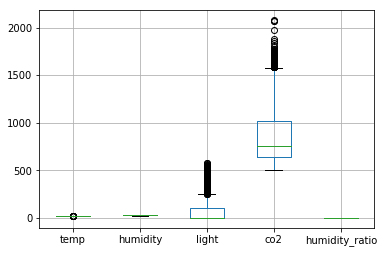

In [548]:
df_test.boxplot()

In [549]:
test_features=df_test[['temp','humidity','light','co2','humidity_ratio']]

In [550]:
outliers_cap(df_test,features,1.5)

In [551]:
#Saperate numeric columns from original df_test
test_num_data=df_test.select_dtypes(include=np.number)
test_date_time=df_test['date_time']

In [552]:
scaler=MinMaxScaler()
scaler.fit(test_num_data)
#Scaled numeric features & rename scaled columns 
Scaled_df_test=scaler.transform(test_num_data)
Scaled_df_test=pd.DataFrame(Scaled_df_test,columns=['S_temp','S_humidity','S_light','S_co2','S_humidity_ratio'])


In [553]:
test=pd.concat([df_test,Scaled_df_test],axis=1) #Concat scaled columns with exsting dataset

In [554]:
test.head(3)

,date_time,temp,humidity,light,co2,humidity_ratio,S_temp,S_humidity,S_light,S_co2,S_humidity_ratio
0,2015-02-14 13:59:59,20.390,35.433333,31.0,502.333333,0.005255,0.177253,0.928611,0.121271,0.002158,0.764015
1,2015-02-14 14:00:59,20.365,35.425000,31.0,503.250000,0.005246,0.169867,0.927917,0.121271,0.003006,0.759685
2,2015-02-14 14:02:00,20.390,35.500000,31.0,508.500000,0.005265,0.177253,0.934167,0.121271,0.007862,0.768598


In [555]:
#Remove old non scaled features
test=test.drop(['temp','humidity','light','co2','humidity_ratio'],axis=1)

In [556]:
#### Remove prefix 'S_' & rename columns with original name
test.columns=test.columns.str.replace('S_','')

test=test[['temp','humidity','light','co2','humidity_ratio']];test.head()

,temp,humidity,light,co2,humidity_ratio
0,0.177253,0.928611,0.121271,0.002158,0.764015
1,0.169867,0.927917,0.121271,0.003006,0.759685
2,0.177253,0.934167,0.121271,0.007862,0.768598
3,0.157558,0.934167,0.121271,0.009866,0.758568
4,0.147710,0.941667,0.112143,0.008324,0.759716


In [557]:
#add 'date_time' as it is in test data
test['date_time']=test_date_time

In [558]:
#Convert datetime into datetime
test['date_time']=pd.to_datetime(test.date_time)


In [559]:
# Seperate hrs from datetime & add as a new column hrs in existing data
test['hrs']=test.date_time.dt.hour

In [560]:
#Remove Date_time from dataframe
new_test=test.drop(['date_time'],axis=1) #Store dataset to X_tset


In [561]:
new_test.head()

,temp,humidity,light,co2,humidity_ratio,hrs
0,0.177253,0.928611,0.121271,0.002158,0.764015,13
1,0.169867,0.927917,0.121271,0.003006,0.759685,14
2,0.177253,0.934167,0.121271,0.007862,0.768598,14
3,0.157558,0.934167,0.121271,0.009866,0.758568,14
4,0.147710,0.941667,0.112143,0.008324,0.759716,14


In [562]:
new_test.reset_index(drop=True, inplace=True)

In [564]:
pred_test=model_rf.predict(new_test)

In [567]:
my_submission = pd.DataFrame({'hrs': new_test['hrs'], 'suitable': pred_test})
# you could use any filename. We choose submission here
my_submission.to_csv("E:\Siemens_test\dataset\mytest.csv", index=False)